# Wykresy przedstawiające dane dostępne w NIH Chest X-rays dataset 

## 0. Przygotowanie Danych

### 0.1 Potrzebne biblioteki

In [ ]:
#(opcjonalne) instalacja
%pip install matplotlib
%pip install seaborn
%pip install pandas
%pip install numpy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### 0.2 Stworzenie Dataframe-u

In [ ]:
df = pd.read_csv("Data/Data_Entry_2017.csv")
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [4]:
df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [5]:
df.drop(columns=['Unnamed: 11'],axis=1,inplace=True)
df.rename(columns={'OriginalImage[Width':'Width','Height]':'Height','OriginalImagePixelSpacing[x':'SpacingX','y]':'SpacingY'},inplace=True)
df.head()


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Width,Height,SpacingX,SpacingY
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


## 1. Wykresy

### 1.1 Popularność chorób 

In [6]:
df_illnesses = df.groupby(['Patient ID'])['Finding Labels'].apply(
    lambda x: set(f for findings in x for f in findings.split('|'))
).reset_index()
df_illnesses.head()

,Patient ID,Finding Labels
0,1,"{Emphysema, Cardiomegaly, Effusion}"
1,2,{No Finding}
2,3,"{Infiltration, Hernia}"
3,4,"{Nodule, Mass}"
4,5,"{Infiltration, No Finding, Effusion}"


In [7]:
illness_count = {}
for findings in df_illnesses['Finding Labels']:
    for illness in findings:
        if illness in illness_count:
            illness_count[illness] += 1
        else:
            illness_count[illness] = 1
illness_count = dict(sorted(illness_count.items(), key=lambda item: item[1], reverse=True))
illness_count

{'No Finding': 24907,
 'Infiltration': 8035,
 'Atelectasis': 4981,
 'Effusion': 4275,
 'Nodule': 3394,
 'Mass': 2568,
 'Consolidation': 2150,
 'Pleural_Thickening': 2006,
 'Cardiomegaly': 1566,
 'Pneumothorax': 1487,
 'Fibrosis': 1260,
 'Edema': 1073,
 'Emphysema': 1046,
 'Pneumonia': 1008,
 'Hernia': 134}

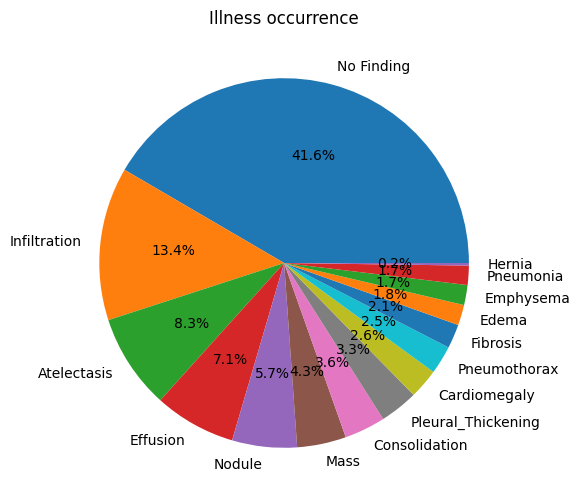

In [8]:
plt.figure(figsize=(12,6))
plt.title("Illness occurrence")
plt.pie(x=illness_count.values(),labels=illness_count.keys(), autopct='%1.1f%%')
plt.show()

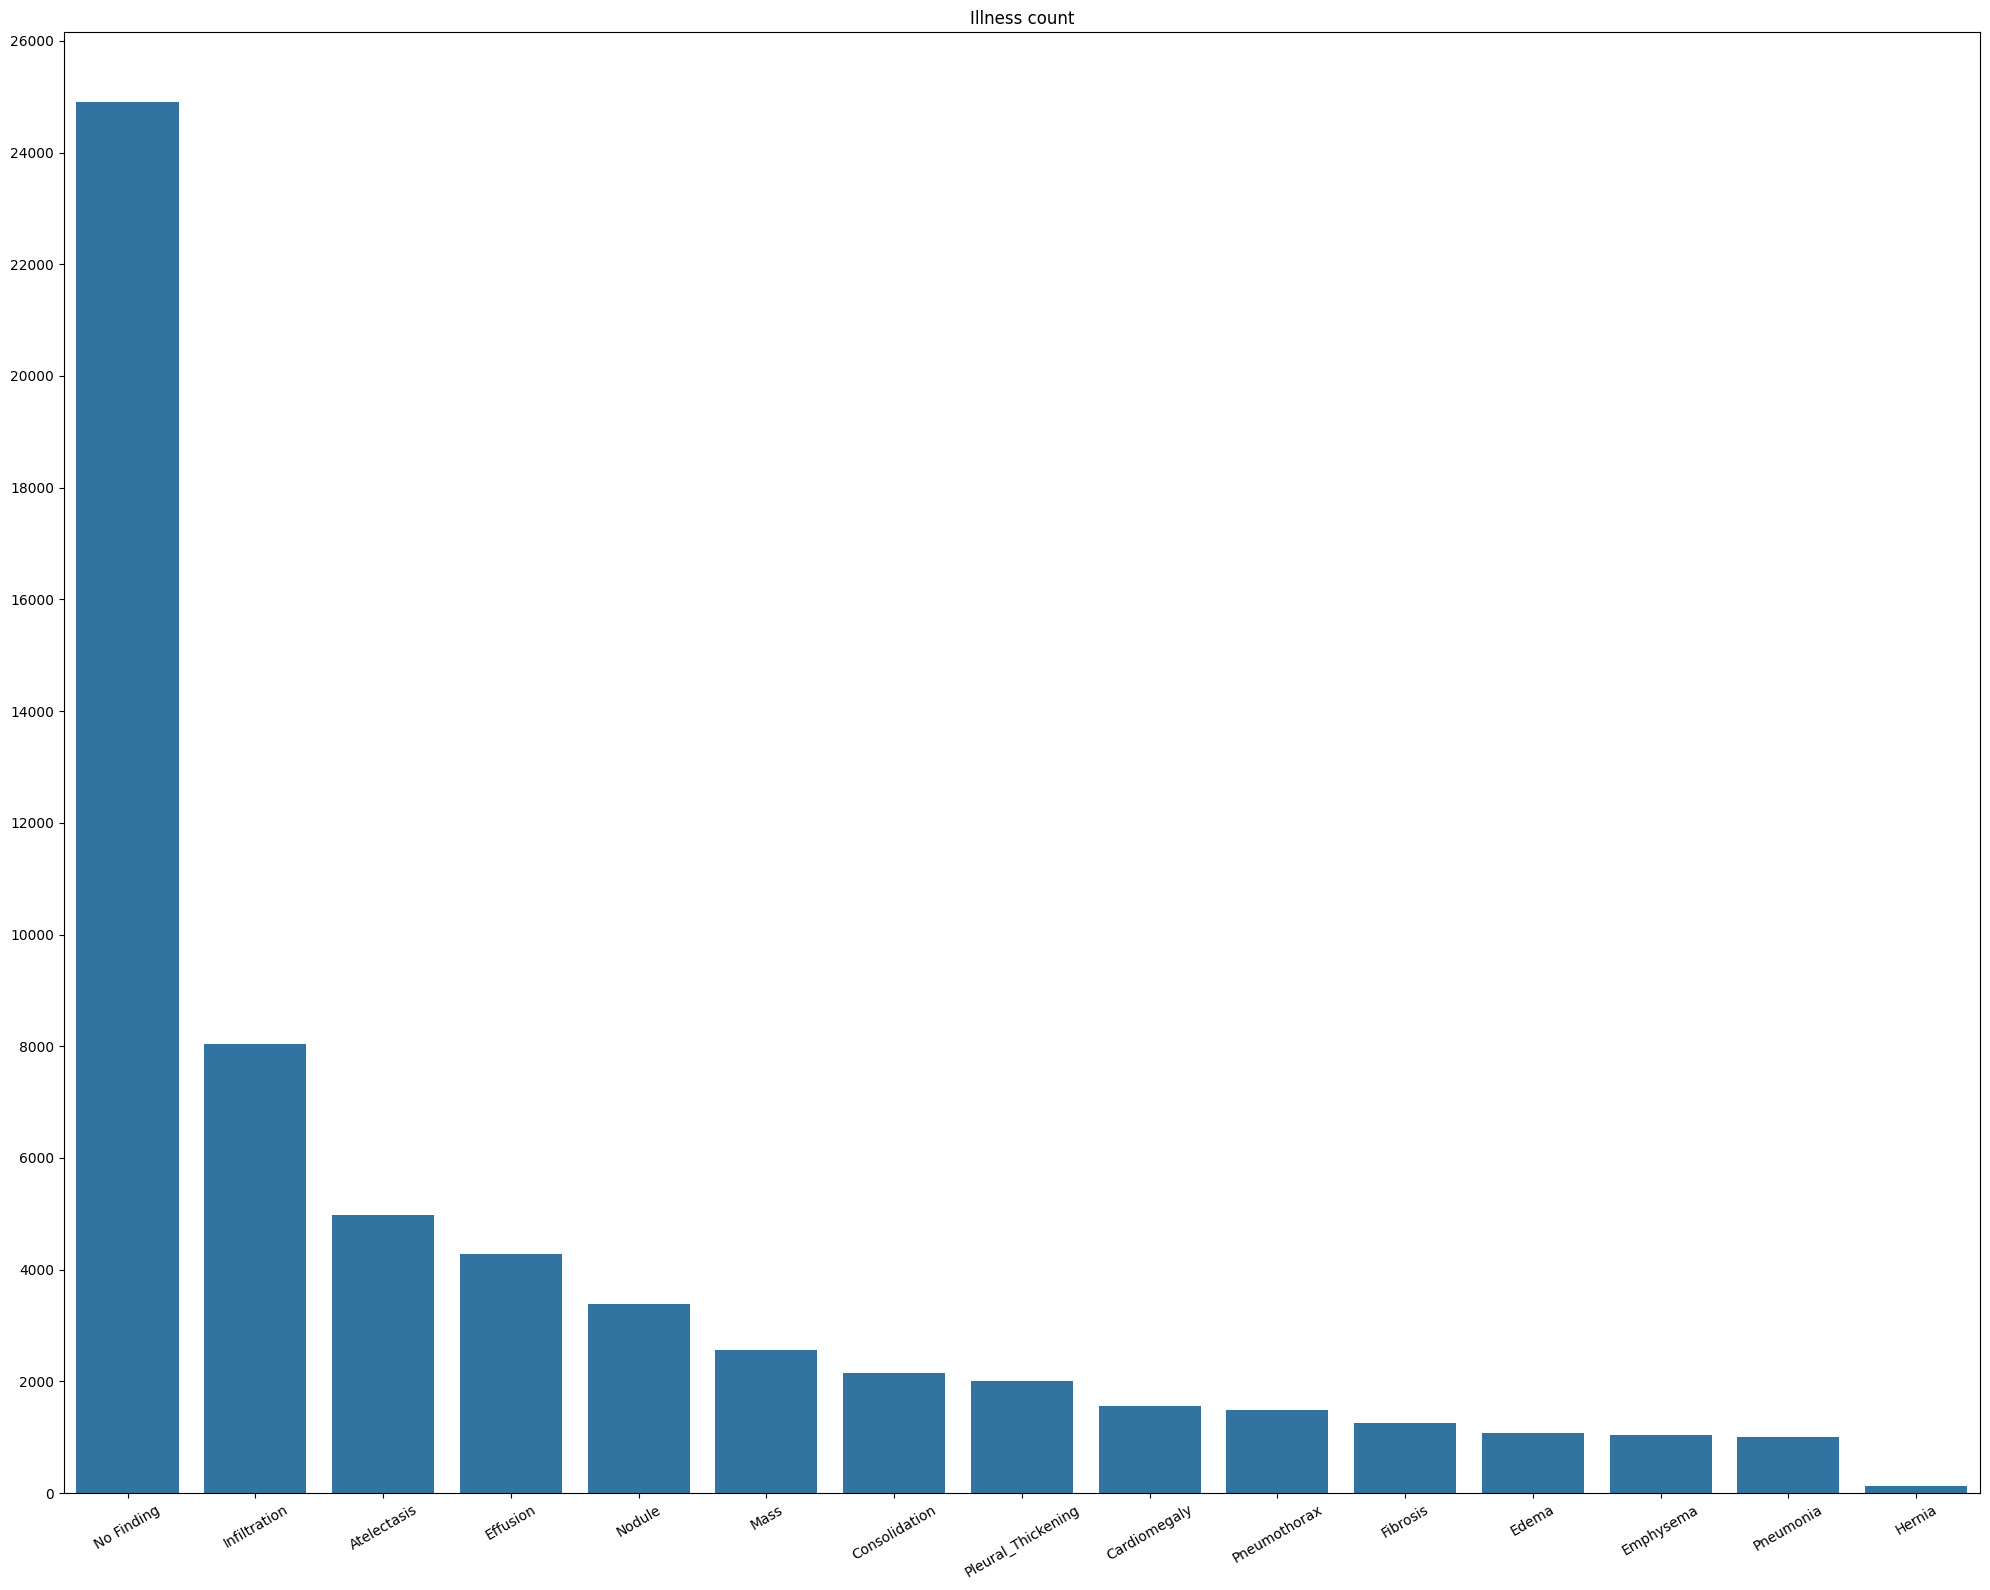

In [16]:
plt.figure(figsize=(20,16))
plt.title("Illness count")
sns.barplot(x=illness_count.keys(),y=illness_count.values())
max_y = int(max(illness_count.values()))
plt.yticks(np.arange(0,max_y + 2000,2000))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()